## Import Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import calendar

## Import Data & Merge Data

In [2]:
files = [file for file in os.listdir('./Sales_Data')]

all_data = pd.DataFrame()

for file in files:
    df = pd.read_csv('./Sales_Data/'+file)
    all_data = pd.concat([all_data, df])


# Membuat file all_data.csv
all_data.to_csv('all_data.csv', index=False)

In [3]:
all_data = pd.read_csv('all_data.csv')
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


## Cleaning Data

#### Mencari NaN dan menghapus nya

In [4]:
all_null = all_data[all_data.isnull().any(axis=1)]
all_null.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1,NaN,NaN,NaN,NaN,NaN,NaN
356,NaN,NaN,NaN,NaN,NaN,NaN
735,NaN,NaN,NaN,NaN,NaN,NaN
1433,NaN,NaN,NaN,NaN,NaN,NaN
1553,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
all_data = all_data.dropna(how='all')

#### Mencari 'Or' dan Menghapus nya

In [6]:
all_data = all_data[all_data['Order Date'].str[0:2] != 'Or']

### Mengubah Tipe Kolom Quantity Order dan Price Each

In [7]:
all_data['Quantity Ordered'] = all_data['Quantity Ordered'].astype('int32')
all_data['Price Each'] = all_data['Price Each'].astype('float32')

## Membuat Kolom Bulan

In [8]:
all_data['Month'] = all_data['Order Date'].str[0:2]
all_data['Month'] = all_data['Month'].astype('int32')
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.950000,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4
2,176559,Bose SoundSport Headphones,1,99.989998,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4
3,176560,Google Phone,1,600.000000,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
4,176560,Wired Headphones,1,11.990000,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
5,176561,Wired Headphones,1,11.990000,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4


## Membuat Kolom Sales (Quantity Ordered * Price Each)

In [9]:
all_data['Sales'] = all_data['Quantity Ordered'] * all_data['Price Each']
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,176558,USB-C Charging Cable,2,11.950000,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.900000
2,176559,Bose SoundSport Headphones,1,99.989998,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.989998
3,176560,Google Phone,1,600.000000,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.000000
4,176560,Wired Headphones,1,11.990000,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.990000
5,176561,Wired Headphones,1,11.990000,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.990000


# Question 1: What was the best month for Sales and How much was earned that Month?

In [10]:
results = all_data.groupby('Month').sum()
results

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Sales
Month,,,,,,,
1,2971502978172978172979692983442990492991253003...,Lightning Charging CableiPhoneLightning Chargi...,10903,1811768.375,01/01/20 00:3801/01/20 00:2201/01/20 00:2201/0...,"427 Wilson St, Dallas, TX 75001519 13th St, Ne...",1.822257e+06
2,1505021505031505041505051505061505071505081505...,iPhoneAA Batteries (4-pack)27in 4K Gaming Moni...,13449,2188884.750,02/18/19 01:3502/13/19 07:2402/18/19 09:4602/0...,"866 Spruce St, Portland, ME 0410118 13th St, S...",2.202022e+06
3,1505331505411508121517491520361532841535441538...,AAA Batteries (4-pack)AAA Batteries (4-pack)Wi...,17005,2791207.750,03/01/19 03:0603/01/19 01:0303/01/19 02:1803/0...,"270 Dogwood St, San Francisco, CA 94016683 Ada...",2.807100e+06
4,1765581765591765601765601765611765621765631765...,USB-C Charging CableBose SoundSport Headphones...,20558,3367671.000,04/19/19 08:4604/07/19 22:3004/12/19 14:3804/1...,"917 1st St, Dallas, TX 75001682 Chestnut St, B...",3.390670e+06
5,1769781775511777781777781790761790761791341800...,Apple Airpods Headphones27in FHD MonitoriPhone...,18667,3135125.000,05/01/19 03:2905/01/19 00:1305/01/19 00:4805/0...,"589 Lake St, Portland, OR 97035615 Lincoln St,...",3.152607e+06
6,2099212099222099232099242099252099262099272099...,USB-C Charging CableMacbook Pro LaptopThinkPad...,15253,2562025.500,06/23/19 19:3406/30/19 10:0506/24/19 20:1806/0...,"950 Walnut St, Portland, ME 0410180 4th St, Sa...",2.577802e+06
7,2229102229112229122229132229142229152229162229...,Apple Airpods HeadphonesFlatscreen TVAA Batter...,16072,2632539.500,07/26/19 16:5107/05/19 08:5507/29/19 12:4107/2...,"389 South St, Atlanta, GA 30301590 4th St, Sea...",2.647776e+06
8,2366702366712366722366732366742366752366762366...,Wired HeadphonesBose SoundSport HeadphonesiPho...,13448,2230345.500,08/31/19 22:2108/15/19 15:1108/06/19 14:4008/2...,"359 Spruce St, Seattle, WA 98101492 Ridge St, ...",2.244468e+06
9,2388342392852406362410542423432428652436672449...,Apple Airpods Headphones34in Ultrawide Monitor...,13109,2084992.125,09/01/19 04:1309/01/19 01:0909/01/19 02:0709/0...,"761 Forest St, San Francisco, CA 94016373 1st ...",2.097560e+06


## Visualisasi Question 1

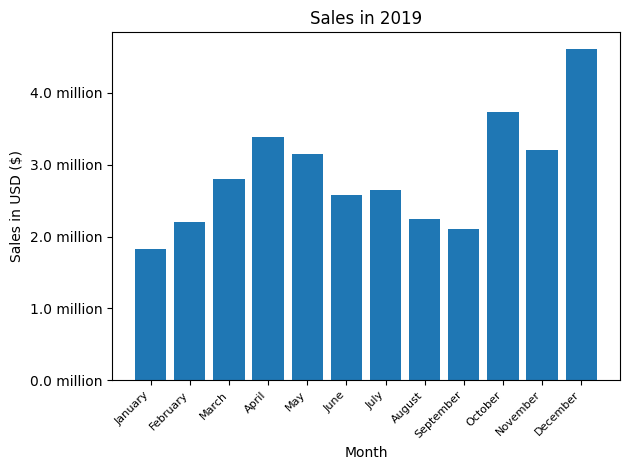

In [11]:
fig, ax = plt.subplots()

months = range(1,13)
month_name = [calendar.month_name[i] for i in months]

plt.bar(months, results['Sales'])
plt.xticks(months, month_name)
plt.xlabel('Month')
plt.ylabel('Sales in USD ($)')

ax.set_title("Sales in 2019")
# Mengubah default formatter 
ax.yaxis.set_major_formatter(lambda x, pos: '{:.1f} million'.format(x / 1e6))
# Mengatur label bulan dengan rotasi dan horizontal alignment
plt.xticks(months, month_name, rotation=45, ha='right', fontsize=8)

plt.tight_layout()
plt.show()

# Question 2:What City Sold The Most Product? 

### Membuat Kolom 'City'

In [12]:
all_data['City'] = all_data['Purchase Address'].apply(lambda x: x.split(',')[1])
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,176558,USB-C Charging Cable,2,11.950000,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.900000,Dallas
2,176559,Bose SoundSport Headphones,1,99.989998,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.989998,Boston
3,176560,Google Phone,1,600.000000,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.000000,Los Angeles
4,176560,Wired Headphones,1,11.990000,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.990000,Los Angeles
5,176561,Wired Headphones,1,11.990000,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.990000,Los Angeles


In [13]:
results = all_data.groupby('City').sum()
results

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
City,,,,,,,,
Atlanta,1765641765711765821765891766231766271766341766...,USB-C Charging CableLightning Charging CableBo...,16602,2779908.250,04/12/19 10:5804/19/19 14:2904/27/19 12:2004/0...,"790 Ridge St, Atlanta, GA 30301253 Johnson St,...",104794,2.795499e+06
Austin,1765911766091766741766771766861767011767051767...,Apple Airpods HeadphonesApple Airpods Headphon...,11153,1809873.625,04/21/19 07:2104/11/19 16:5904/20/19 20:5304/0...,"600 Maple St, Austin, TX 73301267 11th St, Aus...",69829,1.819582e+06
Boston,1765591765661765781765811765851765851766001766...,Bose SoundSport HeadphonesWired HeadphonesAppl...,22528,3637409.750,04/07/19 22:3004/08/19 14:0504/09/19 23:3504/0...,"682 Chestnut St, Boston, MA 0221583 7th St, Bo...",141112,3.661642e+06
Dallas,1765581765691765701765771765961766021766101766...,USB-C Charging Cable27in 4K Gaming MonitorAA B...,16730,2752627.750,04/19/19 08:4604/16/19 19:2304/22/19 15:0904/0...,"917 1st St, Dallas, TX 75001657 Hill St, Dalla...",104620,2.767975e+06
Los Angeles,1765601765601765611765671765741765741765761765...,Google PhoneWired HeadphonesWired HeadphonesGo...,33289,5421435.000,04/12/19 14:3804/12/19 14:3804/30/19 09:2704/1...,"669 Spruce St, Los Angeles, CA 90001669 Spruce...",208325,5.452571e+06
New York City,1765721765751765791765901765991766131766371766...,Apple Airpods HeadphonesAAA Batteries (4-pack)...,27932,4635371.000,04/04/19 20:3004/27/19 00:3004/11/19 10:2304/1...,"149 Dogwood St, New York City, NY 10001433 Hil...",175741,4.664317e+06
Portland,1765831765931766171766421766461766481766621767...,AAA Batteries (4-pack)Lightning Charging Cable...,14053,2307747.500,04/20/19 12:0004/15/19 13:4504/25/19 08:0304/1...,"146 Jackson St, Portland, OR 97035906 7th St, ...",87765,2.320491e+06
San Francisco,1765621765651765731765841765861765861765941765...,USB-C Charging CableMacbook Pro LaptopUSB-C Ch...,50239,8211461.500,04/29/19 13:0304/24/19 10:3804/27/19 18:4104/2...,"381 Wilson St, San Francisco, CA 94016915 Will...",315520,8.262204e+06
Seattle,1765631765681765881766121766241766541766631766...,Bose SoundSport HeadphonesLightning Charging C...,16553,2733296.000,04/02/19 07:4604/15/19 12:1804/02/19 04:0004/0...,"668 Center St, Seattle, WA 98101438 Elm St, Se...",104941,2.747755e+06


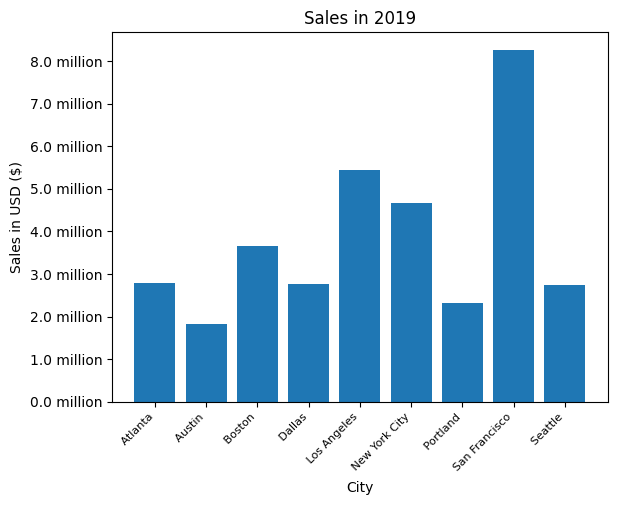

In [14]:
fig, ax = plt.subplots()

cities = results.index
sales = results['Sales']

plt.bar(cities, sales)
plt.xticks(rotation=45, ha='right', fontsize=8)
plt.xlabel('City')
plt.ylabel('Sales in USD ($)')
ax.set_title("Sales in 2019")

# Mengubah default formatter
ax.yaxis.set_major_formatter(lambda x, pos: '{:.1f} million'.format(x / 1e6))

plt.show()

